# Exemplo de Classificação Multiclasse com RNA

Este notebook demonstra o uso da implementação de Rede Neural Artificial (RNA) para um problema de classificação com múltiplas classes, utilizando o famoso dataset Iris.

## 1. Importação das Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import sys
import os

# Configurações de visualização
plt.style.use('ggplot')
%matplotlib inline

## 2. Importação da RNA Implementada

In [2]:
# Adicionar o diretório src ao PYTHONPATH se estiver executando localmente
module_path = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
if module_path not in sys.path:
    sys.path.insert(0, module_path)

In [3]:
from src.rna import NeuralNetwork

## 3. Carregamento e Exploração dos Dados (Iris Dataset)

In [4]:
# Carregar o conjunto de dados Iris
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

print("Primeiras 5 linhas do conjunto de dados:")
df.head()

Primeiras 5 linhas do conjunto de dados:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 4. Pré-processamento dos Dados

In [5]:
# Normalizar as features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Codificar o target (y) para o formato One-Hot
# Ex: 0 -> [1, 0, 0], 1 -> [0, 1, 0], 2 -> [0, 0, 1]
encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y)

print(f"Formato de X após scaling: {X_scaled.shape}")
print(f"Formato de y após one-hot encoding: {y_onehot.shape}")

Formato de X após scaling: (150, 4)
Formato de y após one-hot encoding: (150, 3)


In [6]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_onehot, test_size=0.3, random_state=42, stratify=y)

## 5. Criação e Treinamento do Modelo

In [7]:
n_features = X_train.shape[1]
n_classes = y_train.shape[1]

# Criar o modelo com a arquitetura adequada para o problema
model = NeuralNetwork(
    layer_sizes=[n_features, 10, 10, n_classes], # A saída deve ter o número de classes
    activation_functions=['relu', 'relu', 'softmax'] # Usar softmax na saída
)

print("Arquitetura do modelo:")
print(model)

Arquitetura do modelo:
NeuralNetwork(layers=[4, 10, 10, 3], activation=['relu', 'relu', 'softmax'])


In [8]:
# Treinar o modelo
history = model.fit(
    X_train, y_train,
    epochs=500,
    batch_size=16,
    learning_rate=0.1,
    loss_function='categorical_crossentropy', # Usar a perda correta
    optimizer='momentum',
    verbose=True
)

Época 100/500 - loss: 0.0231
Época 200/500 - loss: 0.0143
Época 300/500 - loss: 0.0140
Época 400/500 - loss: 0.0051
Época 500/500 - loss: 0.0036


## 6. Avaliação do Modelo

In [9]:
# Fazer predições no conjunto de teste
y_pred_proba = model.predict(X_test, output_activation='softmax')

# Converter as probabilidades em classes (o índice com maior probabilidade)
y_pred_classes = np.argmax(y_pred_proba, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Calcular a acurácia
accuracy = accuracy_score(y_test_classes, y_pred_classes)

print(f"Acurácia no conjunto de teste: {accuracy:.4f} ({accuracy*100:.2f}%)")

print("\nRelatório de Classificação:")
print(classification_report(y_test_classes, y_pred_classes, target_names=iris.target_names))

# Verificar se atende ao requisito do enunciado (erro < 50% -> acurácia > 50%)
print(f"O modelo {'atende' if accuracy > 0.5 else 'não atende'} ao requisito de desempenho.")

Acurácia no conjunto de teste: 0.9333 (93.33%)

Relatório de Classificação:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.83      1.00      0.91        15
   virginica       1.00      0.80      0.89        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45

O modelo atende ao requisito de desempenho.


## 7. Visualização dos Resultados

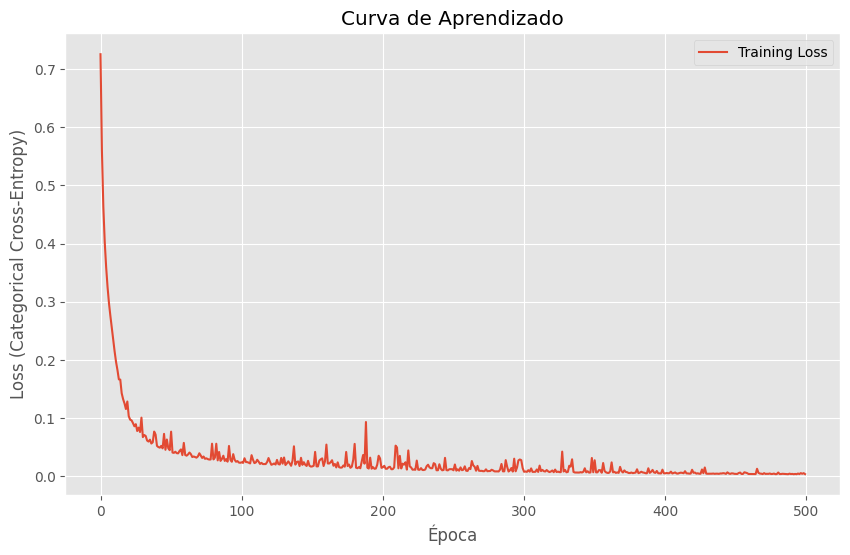

In [10]:
# Visualizar a curva de aprendizado
plt.figure(figsize=(10, 6))
plt.plot(history['loss'], label='Training Loss')
plt.title('Curva de Aprendizado')
plt.xlabel('Época')
plt.ylabel('Loss (Categorical Cross-Entropy)')
plt.legend()
plt.show()

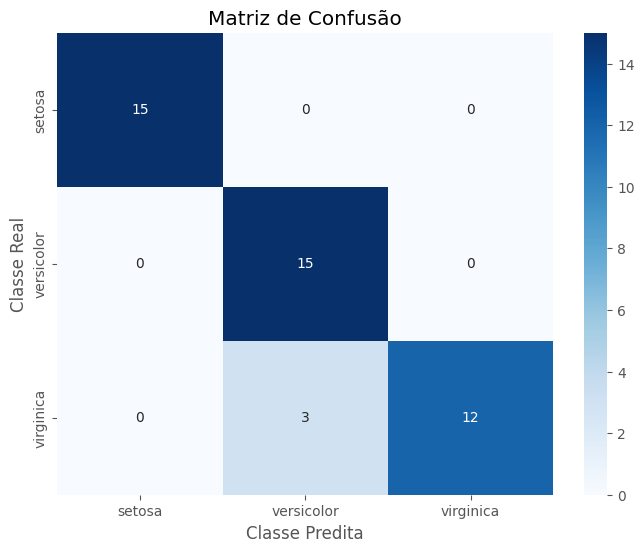

In [11]:
# Visualizar a Matriz de Confusão
cm = confusion_matrix(y_test_classes, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Matriz de Confusão')
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.show()

## 8. Conclusão

Neste notebook, demonstramos o uso da nossa implementação de RNA para um problema de classificação multiclasse. O modelo foi capaz de aprender a distinguir entre as três espécies de flores do dataset Iris com alta acurácia, atendendo aos requisitos do projeto.